In [14]:
import os
import numpy as np
import pandas as pd
import csv
COMMENT_PATH = 'Dataset/comments.csv'
TRANSCRIPT_FOLDER = "Dataset/Transcripts/"
INFO_PATH = "Dataset/infos.csv"
LOG_ERROR_PATH = "DataCollection/error_log.csv"
LOG_SUCCESS_PATH = "DataCollection/success_log.csv"

# 1. Clean empty file
* 清除没有comment / transcript的数据

In [2]:
comment_df = pd.read_csv(COMMENT_PATH)
info_df = pd.read_csv(INFO_PATH)

In [3]:
comment_df.describe()

,vid,uid,content,votes
count,481821,481821,481817,389255
unique,4229,236830,220950,1191
top,wlCz8nkDNqo,UgxXGMg96x9dS7ZcJut4AaABAg,❤,1
freq,480,12,769,52884


In [4]:
comment_df.shape

(481821, 4)

In [5]:
comment_df = comment_df.drop_duplicates(['uid', 'content'])

In [6]:
cleaned_info_df = info_df[info_df['vid'].isin(comment_df['vid'])]
cleaned_info_df.shape

(4410, 7)

In [7]:
# transcript 有1800+个video是空的
empty_vids = set()
for file in os.listdir(TRANSCRIPT_FOLDER):
    if file == '.DS_Store':
        continue
    with open(os.path.join(TRANSCRIPT_FOLDER, file), 'r')as f:
        lines = f.readlines()
        if len(lines) <= 5:
            vid = file.split('.')[0]
            empty_vids.add(vid)

In [8]:
cleaned_info_df = cleaned_info_df[~info_df['vid'].isin(empty_vids)]

<ipython-input-8-8912f1cf3b77>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_info_df = cleaned_info_df[~info_df['vid'].isin(empty_vids)]


In [9]:
deleted_infos = info_df[~info_df['vid'].isin(cleaned_info_df['vid'])]
deleted_infos.shape

(2523, 7)

In [10]:
cleaned_info_df.shape

(2860, 7)

In [11]:
cleaned_info_df = cleaned_info_df.drop_duplicates(['vid'])
cleaned_info_df.shape

(2740, 7)

In [12]:

cleaned_info_df.to_csv('info.csv', index=None)

## 1.2 清理空数据之后的分类结果
1. News和Education 最多，都超过300了

In [13]:
deleted_infos['tag'].value_counts()

Education        376
News             372
Vlog             231
Music            221
Fashion          218
Art              194
Sport            176
Game             171
Entertainment    161
Tech             160
Food             127
Motivation       116
Name: tag, dtype: int64

<AxesSubplot:>

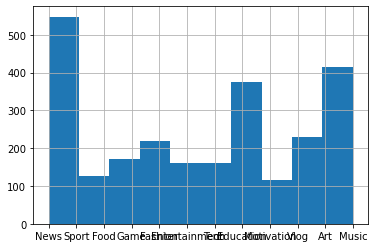

In [14]:
deleted_infos['tag'].hist()

# 2. Video Information Profile
* 每个属性的nan情况
* tag的分布
* 发布时间
* views需要处理成数据

 原来有5283个video

In [15]:
infos = pd.read_csv("info.csv")
infos.describe()

,vid,title,tag,time,duration,views,link
count,2740,2740,2740,2740,2740,2738,2740
unique,2740,2734,12,89,1481,2735,2740
top,syvOBw0JFyQ,I Went UNDERCOVER in Nick Eh 30's Fashion Show!,Tech,1 month ago,1:00,"471,298 views",https://www.youtube.com/watch?v=HMYcI90njDw
freq,1,2,306,252,25,2,1


## 2.1 duration

In [16]:
infos['duration']

0       3:11
1       8:35
2       3:46
3       1:41
4       2:41
        ... 
2735    3:27
2736    4:57
2737    3:08
2738    2:32
2739    3:42
Name: duration, Length: 2740, dtype: object

In [17]:
def trans_duration(string):
    miniute, second = string.split(':')[-2], string.split(':')[-1]
    if len(string.split(':')) == 3:
        hour = string.split(':')[0]
    else:
        hour = 0
    return (int(hour)* 3600 + int(miniute)*60 + int(second))/60
infos['duration'] = infos['duration'].apply(trans_duration)
infos['duration'].describe()

count    2740.000000
mean       18.942701
std        35.841803
min         0.216667
25%         6.083333
50%        11.500000
75%        19.450000
max       801.566667
Name: duration, dtype: float64

In [18]:
infos = infos[infos['duration'] < 20]
infos.describe()

,duration
count,2086.000000
mean,9.254666
std,5.196186
min,0.216667
25%,4.583333
50%,9.116667
75%,13.262500
max,19.983333


## 2.2 views

In [19]:
infos.views

0          143,423 views
1        1,129,023 views
2           73,366 views
3          122,448 views
4          309,045 views
              ...       
2735         1,261 views
2736       806,112 views
2737    37,929,473 views
2738     1,095,318 views
2739       335,583 views
Name: views, Length: 2086, dtype: object

In [20]:
def trans_views(string):
    try:
        return int(string.strip('views').replace(',',''))/10000
    except:
        return 
infos['view_10k'] = infos['views'].apply(trans_views)

In [21]:
infos['view_10k']

0         14.3423
1        112.9023
2          7.3366
3         12.2448
4         30.9045
          ...    
2735       0.1261
2736      80.6112
2737    3792.9473
2738     109.5318
2739      33.5583
Name: view_10k, Length: 2086, dtype: float64

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'view_10k'}>]], dtype=object)

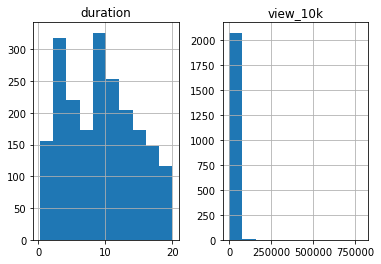

In [22]:
infos.hist()

In [23]:
infos.to_csv('new_infos.csv', index = None)

In [24]:
infos = pd.read_csv("new_infos.csv")
infos.head()

,vid,title,tag,time,duration_min,views,link,view_10k
0,tZa4hs1MY3Y,Secret Service pushes back on allegations in r...,News,1 day ago,3.183333,"143,423 views",https://www.youtube.com/watch?v=tZa4hs1MY3Y,14.3423
1,oOcZRxBwZ1k,Trump Coup Nightmare: See The Moment Fox News ...,News,15 hours ago,8.583333,"1,129,023 views",https://www.youtube.com/watch?v=oOcZRxBwZ1k,112.9023
2,jLkqmXmkVkE,Putin warns after Finland and Sweden invited t...,News,15 hours ago,3.766667,"73,366 views",https://www.youtube.com/watch?v=jLkqmXmkVkE,7.3366
3,t2nu91KU25g,Biden loses Supreme Court ruling as court rein...,News,1 hour ago,1.683333,"122,448 views",https://www.youtube.com/watch?v=t2nu91KU25g,12.2448
4,tSJf6KEC5qc,India state on alert after Prophet Muhammad ro...,News,23 hours ago,2.683333,"309,045 views",https://www.youtube.com/watch?v=tSJf6KEC5qc,30.9045


## 3. Comment

In [262]:
comments = pd.read_csv('Dataset/comments.csv')
comments.head()

,vid,uid,content,votes
0,tZa4hs1MY3Y,UgxDRq2kfKKUdlLpBZl4AaABAg,I would be shocked if the committee hasn't alr...,170.0
1,tZa4hs1MY3Y,Ugxove78337i20X3u614AaABAg,My favorite part of the hearing was at the end:,2.0
2,tZa4hs1MY3Y,UgxOhb_QtgvMJ8Age_B4AaABAg,Her position within the west wing was specific...,4.0
3,tZa4hs1MY3Y,UgwSx3EZ9UZXPwroBB54AaABAg,"""Too good to verify"" as they say in the ABC, N...",6.0
4,tZa4hs1MY3Y,Ugz1NKYar4WApnMFHyd4AaABAg,Her “hear say” testimony would never be allowe...,1.0


In [263]:
comments.describe()

,votes
count,238443.000000
mean,248.606761
std,3432.461400
min,0.000000
25%,1.000000
50%,4.000000
75%,23.000000
max,855000.000000


## 3.1 检查重复情况
超过一半重复

In [232]:
comments.shape

(238482, 4)

In [118]:
comments = comments.drop_duplicates()
comments.shape

(238482, 4)

In [120]:
comments.to_csv(COMMENT_PATH, index=None)

## 3.2  检查平均每个vid有几个评论
1. vid一共4229个
2. mean = 56条评论
3. 大部分都是60条

[x] 是否需要处理大部分60条，分布太均匀的问题？  

In [121]:
comments['vid'].value_counts().describe()

count    4240.000000
mean       56.245755
std        12.173414
min         1.000000
25%        60.000000
50%        60.000000
75%        60.000000
max       109.000000
Name: vid, dtype: float64

<AxesSubplot:>

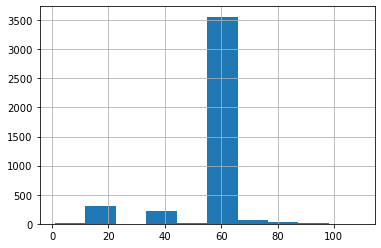

In [122]:
comments['vid'].value_counts().hist()

## 3.3 uid 数据
一共236830个评论，大多数评论都只出现了一次

In [123]:
comments['uid'].value_counts().describe()

count    236839.000000
mean          1.006929
std           0.083103
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: uid, dtype: float64

<AxesSubplot:>

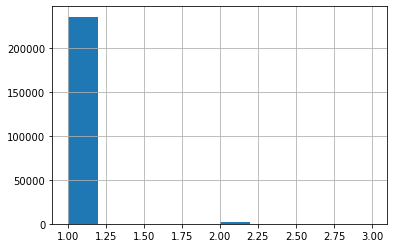

In [132]:
comments.uid.value_counts().hist()

## 3.4 comment votes

In [136]:
comments.votes

0         170.0
1           2.0
2           4.0
3           6.0
4           1.0
          ...  
238477      0.0
238478      0.0
238479      0.0
238480      8.0
238481     15.0
Name: votes, Length: 238482, dtype: float64

In [126]:
# 处理votes
def trans_votes(string):
    if isinstance(string, str):
        if 'k' == string[-1].lower():
            return float(string[:-1])*1000
        return float(string)
comments['votes'] = comments['votes'].fillna('0')
comments['votes'] = comments['votes'].apply(trans_votes)


<AxesSubplot:>

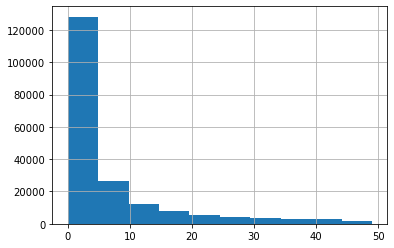

In [140]:
comments[comments.votes<50]['votes'].hist()

## 3.5 content
* 去除除了英文和标点符号以外的所有文字
* 如果剩余文字少于原文字的1/4，则删除整行
* 删除所有小于五个字的content
* 标记出现超过50次的高频评论freq = True/ False

平均字长18

In [264]:
comments = comments.dropna(subset=['content'])

In [265]:
comments.shape

(238468, 4)

In [266]:
import re
texts = list(comments['content'])
def filter_str(desstr, restr=''):
    pattern = re.compile("[^a-z^A-Z^0-9^.^,^:^;^!^?^(^)^_^*^\"^' ]")
    res = pattern.sub(restr, desstr)
    if len(desstr) > len(res)*3:
        return ''
    return res.strip()
comments['en_content'] = comments['content'].apply(filter_str)

In [267]:
comments.head()

,vid,uid,content,votes,en_content
0,tZa4hs1MY3Y,UgxDRq2kfKKUdlLpBZl4AaABAg,I would be shocked if the committee hasn't alr...,170.0,I would be shocked if the committee hasn't alr...
1,tZa4hs1MY3Y,Ugxove78337i20X3u614AaABAg,My favorite part of the hearing was at the end:,2.0,My favorite part of the hearing was at the end:
2,tZa4hs1MY3Y,UgxOhb_QtgvMJ8Age_B4AaABAg,Her position within the west wing was specific...,4.0,Her position within the west wing was specific...
3,tZa4hs1MY3Y,UgwSx3EZ9UZXPwroBB54AaABAg,"""Too good to verify"" as they say in the ABC, N...",6.0,"""Too good to verify"" as they say in the ABC, N..."
4,tZa4hs1MY3Y,Ugz1NKYar4WApnMFHyd4AaABAg,Her “hear say” testimony would never be allowe...,1.0,Her hear say testimony would never be allowed ...


In [268]:
empty_indexs = [i for i, comment in comments.iterrows() if len(comment['en_content']) <= 5]

In [269]:
comments.loc[empty_indexs]

,vid,uid,content,votes,en_content
72,uBZhjmYRWfg,Ugxw9lyfN-J8H3aZL2p4AaABAg,😃,6.0,
83,uBZhjmYRWfg,UgyftiODgrY9RNlheuF4AaABAg,At,8.0,At
193,jLkqmXmkVkE,UgwLZNXWtiHCR2-g3Sh4AaABAg,Lol,9.0,Lol
216,jLkqmXmkVkE,UgxglW4PYKyHHUN3m6J4AaABAg,@,1.0,
228,jLkqmXmkVkE,UgzKyut0uYPBdtKSqBt4AaABAg,0:30,1.0,0:30
...,...,...,...,...,...
238407,duNgBE722vs,UgxzdBZK20CgXypINMV4AaABAg,🔥,2.0,
238408,duNgBE722vs,Ugw7GeKem8HsHPEdlVZ4AaABAg,🔥,2.0,
238411,duNgBE722vs,Ugyd4HkOCe-nq25RtO14AaABAg,💥,1.0,
238448,goMpYAe8e60,Ugz5Ri5duJOiALAO49Z4AaABAg,03:00,129.0,03:00


In [270]:
comments.drop(index=empty_indexs, inplace=True)

In [271]:
comments.shape

(212012, 5)

In [275]:
content_count = comments['en_content'].value_counts()
freq_content = list(content_count[content_count>50].index)
comments['freq'] = comments['en_content'].isin(freq_content)

In [295]:
comments.to_csv('comments.csv', index = None)

In [298]:
# 平均字长
word_length = comments['en_content'].apply(lambda x: len(x.split()))
word_length.mean()

18.385143293775823

In [302]:
unfreq_length = comments[comments['freq']== False]['en_content'].apply(lambda x: len(x.split()))
unfreq_length.mean()

18.508330283253397

# 4 Transcript

In [2]:
# transcript 有1800+个video是空的
empty_trsc_vids = set()
for file in os.listdir(TRANSCRIPT_FOLDER):
    if file == '.DS_Store':
        continue
    path = os.path.join(TRANSCRIPT_FOLDER, file)
    with open(path, 'r')as f:
        lines = f.readlines()
        if len(lines) <= 10:
            vid = file.split('.')[0]
            print(vid)
            print(lines)
            print('='*50)
            empty_trsc_vids.add(vid)

na-EhbQx_Rg
['vid,start,end,text\n', 'na-EhbQx_Rg,340,6640,[Music]\n', 'na-EhbQx_Rg,6640,8350,so\n', 'na-EhbQx_Rg,8350,22640,[Music]\n', 'na-EhbQx_Rg,22640,25640,do\n', 'na-EhbQx_Rg,26860,32559,[Music]\n']
d7kiYLN1Z3w
['vid,start,end,text\n', 'd7kiYLN1Z3w,8320,10590,hmm\n', 'd7kiYLN1Z3w,10590,22240,[Music]\n', 'd7kiYLN1Z3w,22240,25240,like\n', 'd7kiYLN1Z3w,33920,36920,hmm\n', 'd7kiYLN1Z3w,37380,47920,[Music]\n', 'd7kiYLN1Z3w,47920,50920,so\n', 'd7kiYLN1Z3w,53140,58770,[Music]\n', 'd7kiYLN1Z3w,58800,60878,you\n']
cxmzZ9ah64E
['vid,start,end,text\n', 'cxmzZ9ah64E,22240,25240,foreign\n', 'cxmzZ9ah64E,29590,32738,[Music]\n', 'cxmzZ9ah64E,70320,73320,foreign\n', 'cxmzZ9ah64E,80320,83320,foreign\n', 'cxmzZ9ah64E,224239,227239,um\n', 'cxmzZ9ah64E,265840,268840,um\n', 'cxmzZ9ah64E,391919,394290,foreign\n', 'cxmzZ9ah64E,394290,410810,[Music]\n', 'cxmzZ9ah64E,412639,414720,you\n']
SqlzqL9nC_4
['vid,start,end,text\n', 'SqlzqL9nC_4,80,3080,uh\n', 'SqlzqL9nC_4,19119,22119,um\n', 'SqlzqL9nC_4,33160,

D9t1_NbO12I
['vid,start,end,text\n', 'D9t1_NbO12I,5250,8240,[Music]\n', 'D9t1_NbO12I,8240,11559,thank you\n', 'D9t1_NbO12I,16530,23680,[Music]\n', 'D9t1_NbO12I,52100,56079,[Music]\n', 'D9t1_NbO12I,56079,59840,another amazing experience\n']
wE50k4AQho8
['vid,start,end,text\n', 'wE50k4AQho8,1040,4319,i wanna know i wanna know could be red\n', 'wE50k4AQho8,4319,6960,or i could be yellow i could be blue or\n', 'wE50k4AQho8,6960,9040,i could be purple i could be greener\n', 'wE50k4AQho8,9040,11679,pink or black or white it could be every\n', 'wE50k4AQho8,11679,14639,color you like\n']
BFChZomh-Jo
['vid,start,end,text\n', 'BFChZomh-Jo,0,8720,[Music]\n', 'BFChZomh-Jo,8720,11410,okay\n', 'BFChZomh-Jo,11410,14509,[Music]\n', 'BFChZomh-Jo,17440,20440,okay\n', 'BFChZomh-Jo,25310,61120,[Music]\n']
lFiD3AUzYUk
['vid,start,end,text\n', "lFiD3AUzYUk,0,3000,Welcome to Wolfoo's Stories\n", 'lFiD3AUzYUk,3000,5000,Enjoy watching this new episode <3\n', 'lFiD3AUzYUk,260500,307000,"Please like, share and s

tUPcAQuo0jI
['vid,start,end,text\n', "tUPcAQuo0jI,719,2480,i'm sorry\n", "tUPcAQuo0jI,2480,4160,don't believe me\n", 'tUPcAQuo0jI,4160,9319,i want you here with me\n', 'tUPcAQuo0jI,11710,14889,[Applause]\n', 'tUPcAQuo0jI,22530,30239,[Music]\n']
RrKuOgTnocY
['vid,start,end,text\n', 'RrKuOgTnocY,111680,114680,foreign\n', 'RrKuOgTnocY,210959,213840,foreign\n', 'RrKuOgTnocY,336000,339000,foreign\n', 'RrKuOgTnocY,348960,351960,foreign\n', 'RrKuOgTnocY,426080,429080,foreign\n']
jDGFm-VBowI
['vid,start,end,text\n', 'jDGFm-VBowI,0,6429,[Music]\n', 'jDGFm-VBowI,8800,11800,is\n', 'jDGFm-VBowI,12750,16640,[Music]\n', 'jDGFm-VBowI,21810,24869,[Music]\n', 'jDGFm-VBowI,28880,31790,when\n', 'jDGFm-VBowI,31790,35840,[Music]\n', 'jDGFm-VBowI,35840,38840,is\n', 'jDGFm-VBowI,39170,45799,[Music]\n']
FoxJzHQyRyE
['vid,start,end,text\n', 'FoxJzHQyRyE,4110,11729,[Music]\n', 'FoxJzHQyRyE,12880,15880,is\n', 'FoxJzHQyRyE,26800,30960,suddenly you call my name and i lose\n', 'FoxJzHQyRyE,31870,37509,[Music]\n', '

In [4]:
for vid in empty_trsc_vids:
    try:
        path = os.path.join(TRANSCRIPT_FOLDER, vid+'.csv')
        os.remove(path)
        print(vid, 'deleted')
    except:
        print(vid, 'error')

bs3_lazLhOc deleted
2yJFnhWjSy4 deleted
_NiKR3vzf0o deleted
mLFzDJ4rQyc deleted
BFChZomh-Jo deleted
na-EhbQx_Rg deleted
N-p3emMfR3c deleted
jDGFm-VBowI deleted
wE50k4AQho8 deleted
cboWaUdLzGw deleted
Q48fmgNIynQ deleted
2VBcROEDy0s deleted
91V5BBkduyQ deleted
kkxdhkurKak deleted
jGAfcrppxFw deleted
nYY5tz-PTzY deleted
JzDF4dbkReM deleted
zKgrrRU_UgI deleted
gaXQo5D_dgs deleted
iAOeM_d6E3g deleted
9WPrPGA19Uw deleted
FoxJzHQyRyE deleted
cxmzZ9ah64E deleted
SI9isXfowd4 deleted
5LZeSdrRZzQ deleted
gYUcSDjHD_A deleted
7IP5zAefiiQ deleted
McBuV6fud1g deleted
WOmfEtd62aY deleted
NHcMob95EC8 deleted
POUf2rO6xAQ deleted
QtYIAimp3TU deleted
JvyS7aUZbMc deleted
tzluMWgVgko deleted
d7kiYLN1Z3w deleted
RrKuOgTnocY deleted
s7_hNcmS-bw deleted
M8rnCHUHniw deleted
ub1WfnpqXFc deleted
Xw4MB4xiXhY deleted
tUPcAQuo0jI deleted
oiMDMOlgQz8 deleted
lFiD3AUzYUk deleted
2rkoe4XfoPI deleted
mw8TmzYwzZA deleted
zPxz33Zwpes deleted
5wM0RP1AHlU deleted
SqlzqL9nC_4 deleted
D9t1_NbO12I deleted
xGWMCOplqUk deleted


## 4.1 检查文本内容，删除一些没啥实际含义的内容

In [5]:
empty_trsc_vids = set()
for file in os.listdir(TRANSCRIPT_FOLDER):
    if file == '.DS_Store':
        continue
    path = os.path.join(TRANSCRIPT_FOLDER, file)
    with open(path, 'r')as f:
        reader = csv.reader(f)
        contents = ' '.join([r[3] for r in reader])
#         print(contents)
        if '[Music]' in contents and len([r[3] for r in reader]) < 4:
            print(path)
            print(contents)
#     break


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
vids = [path.split('.')[0] for path in os.listdir(TRANSCRIPT_FOLDER)]
len(vids)

2532

## 4.2 对比删除没有的视频
* BV0PwOExYp4
* wvz97-lNPH8

In [87]:
comment_df = pd.read_csv(COMMENT_PATH)
info_df = pd.read_csv(INFO_PATH)

In [88]:
info_vids = set(info_df['vid'])
comment_vids = set(comment_df['vid'])
transcript_vids = set()
for file in os.listdir(TRANSCRIPT_FOLDER):
    if file.startswith('.D'):
        continue
    vid = file.split('.')[0]
    transcript_vids.add(vid)
print(len(transcript_vids), len(comment_vids),len(info_ids))

2588 4225 2086


In [89]:
vids = transcript_vids & comment_vids & info_ids
len(vids)

1678

In [90]:
# 删除info中多余部分
info_df = info_df.drop(info_df[~info_df['vid'].isin(vids)].index)

In [91]:
# 删除comment中多余的部分
comment_df = comment_df.drop(comment_df[~comment_df['vid'].isin(vids)].index)

In [94]:
comment_df['vid'].unique()

1678

In [97]:
comment_df.to_csv('comments.csv', index = None)
info_df.to_csv('infos.csv', index=None)

In [100]:
count = 0
for file in os.listdir(TRANSCRIPT_FOLDER):
    vid  = file.split('.')[0]
    if vid not in vids:
        os.remove(os.path.join(TRANSCRIPT_FOLDER, file))
        count += 1

In [101]:
len(os.listdir(TRANSCRIPT_FOLDER))

1678